Import library

In [63]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
print("Tensorflow Decision  Forests version: ", tftd.__version__)

Tensorflow Decision  Forests version:  1.10.0


Load dataset

In [46]:
train_file = "dataset/house-prices-advanced-regression-techniques/train.csv"
df = pd.read_csv(train_file)

In [47]:
format(df.shape)

'(1460, 81)'

In [48]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
df = df.drop("Id", axis=1)
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

House Price Distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_35361/3296060600.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"], color='g', bins=100, hist_kws={'alpha': 0.5, 'edgecolor': 'black'})


<Axes: xlabel='SalePrice', ylabel='Density'>

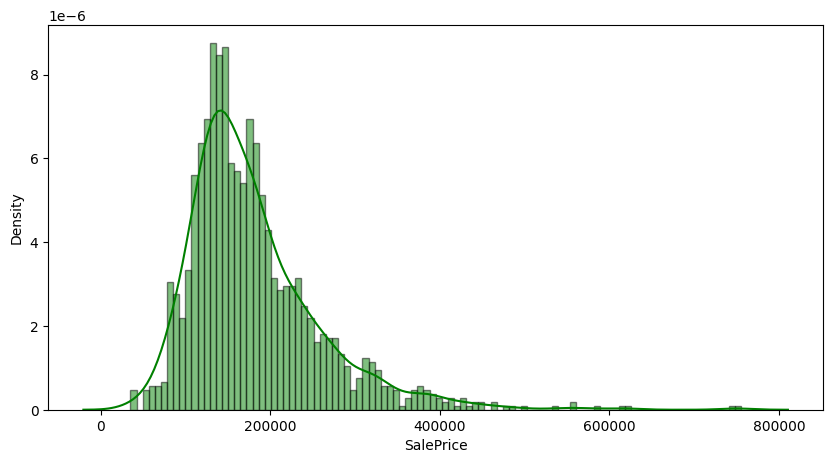

In [51]:
print(df["SalePrice"].describe())
plt.figure(figsize=(10,5))
sns.distplot(df["SalePrice"], color='g', bins=100, hist_kws={'alpha': 0.5, 'edgecolor': 'black'})

Numerical data distribution

In [52]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [53]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


plot the distribution for all the numerical features

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

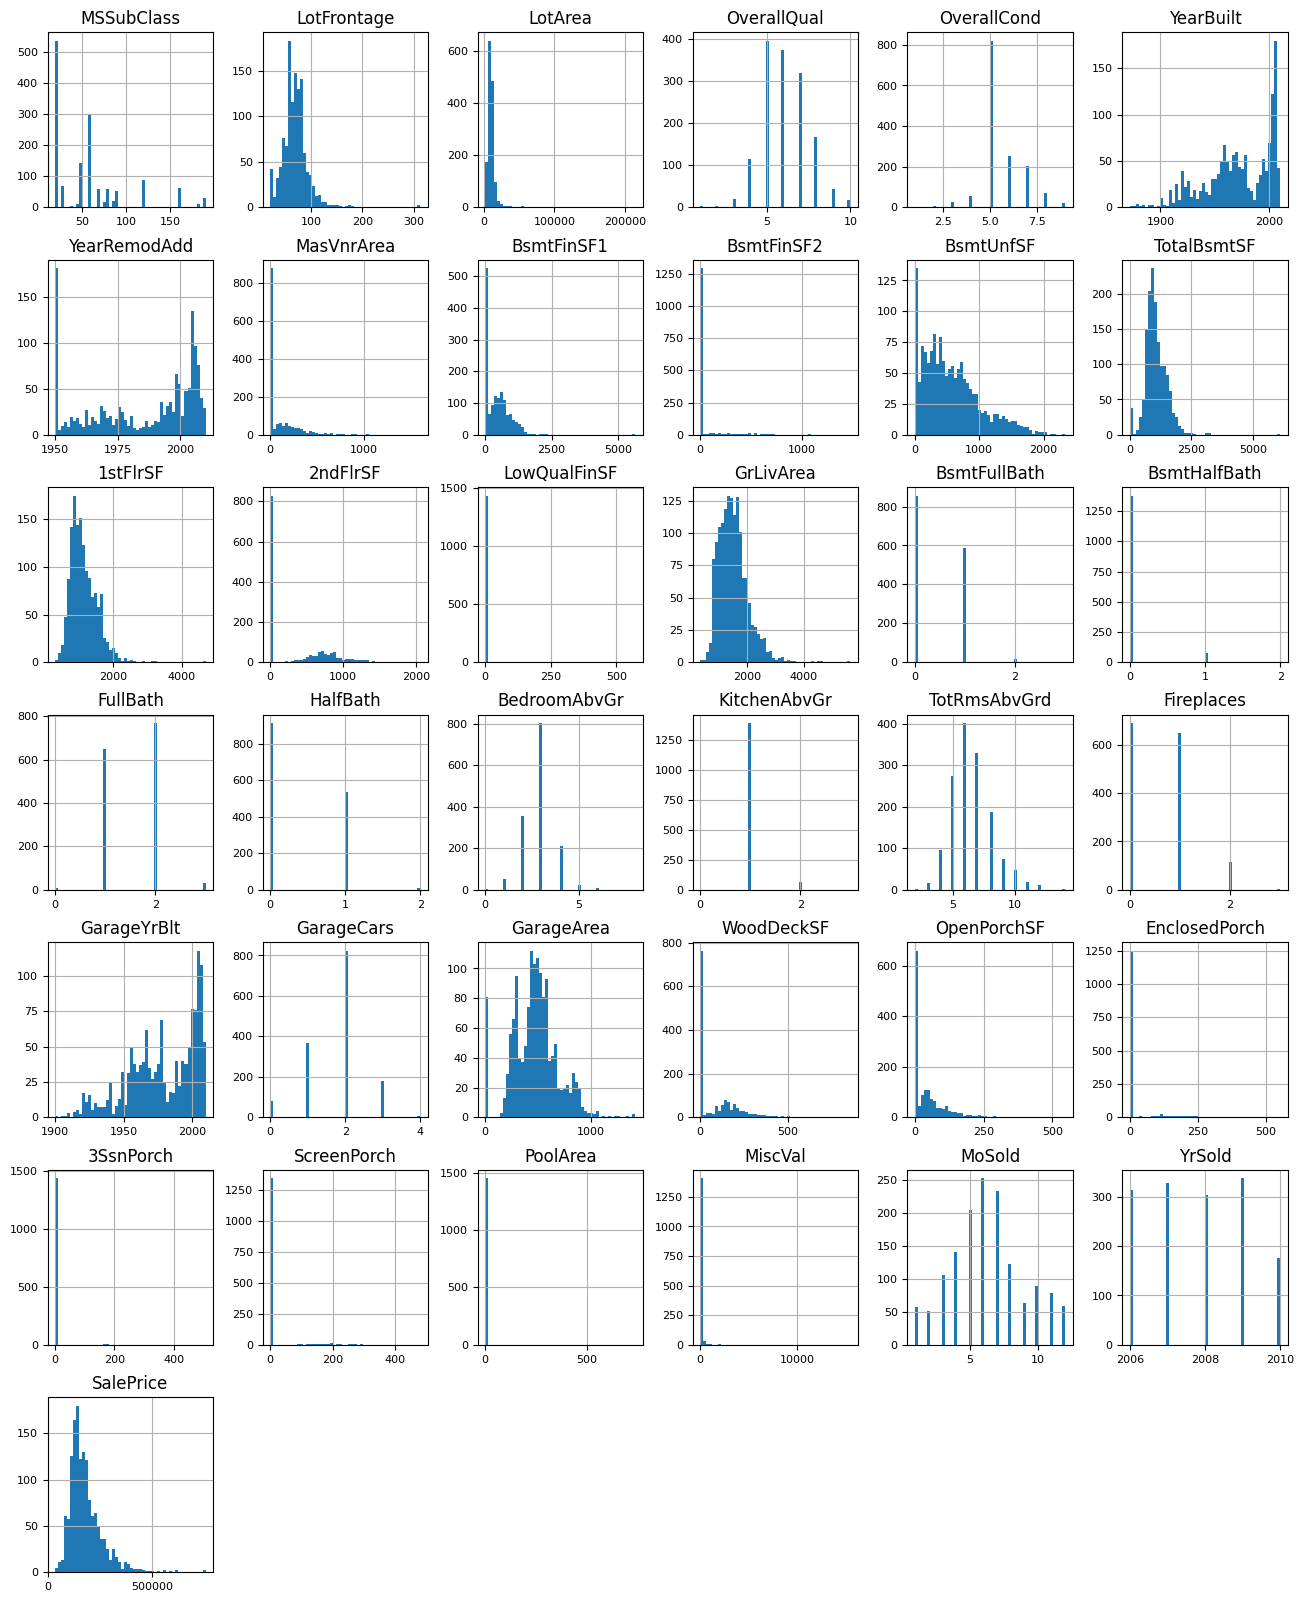

In [54]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

Prepare dataset

In [61]:
import numpy as np
def split_dataset(dataset, test_ratio=0.30):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

train_data, valid_data = split_dataset(df)
print("Training {} examples\nTesting  {} examples".format(len(train_data), len(valid_data)))

Training 1024 examples
Testing  436 examples


convert dataset from Pandas format to Tensorflow format 

In [64]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_data, label=label, task = tfdf.keras.Task.REGRESSION)

2024-08-29 15:00:14.415313: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-08-29 15:00:14.415338: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: duongnh
2024-08-29 15:00:14.415342: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: duongnh
2024-08-29 15:00:14.415451: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 535.183.1
2024-08-29 15:00:14.415464: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 535.183.1
2024-08-29 15:00:14.415467: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:249] kernel version seems to match DSO: 535.183.1


In [66]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

Create a random forest

In [74]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) 

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmppcsfi1yd as temporary training directory


Train model

In [76]:
rf.fit(x=train_ds)

Reading training dataset...


Training dataset read in 0:00:02.256510. Found 1024 examples.
Training model...


I0000 00:00:1724919260.562545   35361 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1724919260.562570   35361 kernel.cc:775] Collect training examples
I0000 00:00:1724919260.562576   35361 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1724919260.562922   35361 kernel.cc:394] Number of batches: 2
I0000 00:00:1724919260.562927   35361 kernel.cc:395] Number of examples: 1024
I0000 00:00:1724919260.563840   35361 data_spec_inference.cc:306] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column BsmtCond (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1724919260.563855   35361 data_spec_inference.cc:306] 1 item(s) have been prun

Model trained in 0:00:01.365763
Compiling model...


I0000 00:00:1724919261.883624   35361 decision_forest.cc:761] Model loaded with 300 root(s), 97488 node(s), and 74 input feature(s).
I0000 00:00:1724919261.886837   35361 abstract_model.cc:1323] Engine "RandomForestGeneric" built
2024-08-29 15:14:21.886863: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model compiled.


In [78]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

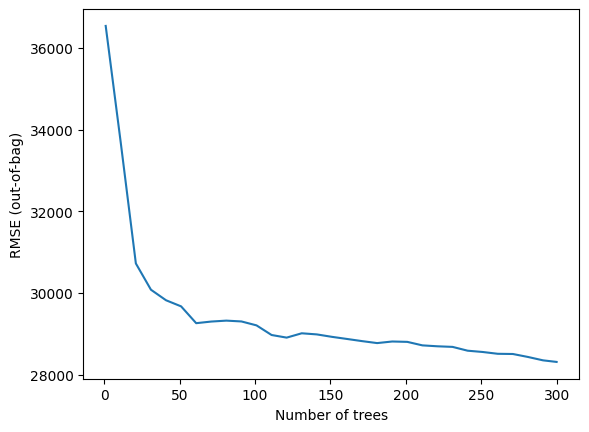

In [81]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [82]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1024, accuracy=None, loss=None, rmse=28312.913997795098, ndcg=None, aucs=None, auuc=None, qini=None)

In [84]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.2f}")

1/1 [==============================] - 0s 184ms/step - loss: 0.0000e+00 - mse: 990858496.0000
loss: 0.00
mse: 990858496.00


In [88]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


In [90]:
inspector.variable_importances()['NUM_AS_ROOT']

[("OverallQual" (1; #62), 87.0),
 ("GarageCars" (1; #32), 36.0),
 ("ExterQual" (4; #22), 33.0),
 ("1stFlrSF" (1; #0), 24.0),
 ("GrLivArea" (1; #38), 12.0),
 ("GarageArea" (1; #31), 11.0),
 ("FullBath" (1; #29), 10.0),
 ("3SsnPorch" (1; #2), 9.0),
 ("BsmtFinSF1" (1; #8), 9.0),
 ("GarageYrBlt" (1; #37), 9.0),
 ("YearBuilt" (1; #76), 8.0),
 ("BedroomAbvGr" (1; #4), 5.0),
 ("EnclosedPorch" (1; #20), 5.0),
 ("LotFrontage" (1; #49), 5.0),
 ("BsmtFinSF2" (1; #9), 4.0),
 ("BsmtQual" (4; #14), 4.0),
 ("KitchenAbvGr" (1; #43), 4.0),
 ("LowQualFinSF" (1; #51), 4.0),
 ("KitchenQual" (4; #44), 3.0),
 ("LotArea" (1; #47), 3.0),
 ("MiscVal" (1; #57), 3.0),
 ("PoolArea" (1; #64), 3.0),
 ("BsmtHalfBath" (1; #13), 2.0),
 ("MasVnrArea" (1; #54), 2.0),
 ("2ndFlrSF" (1; #1), 1.0),
 ("Fireplaces" (1; #27), 1.0),
 ("Neighborhood" (4; #59), 1.0),
 ("OpenPorchSF" (1; #60), 1.0),
 ("TotalBsmtSF" (1; #73), 1.0)]

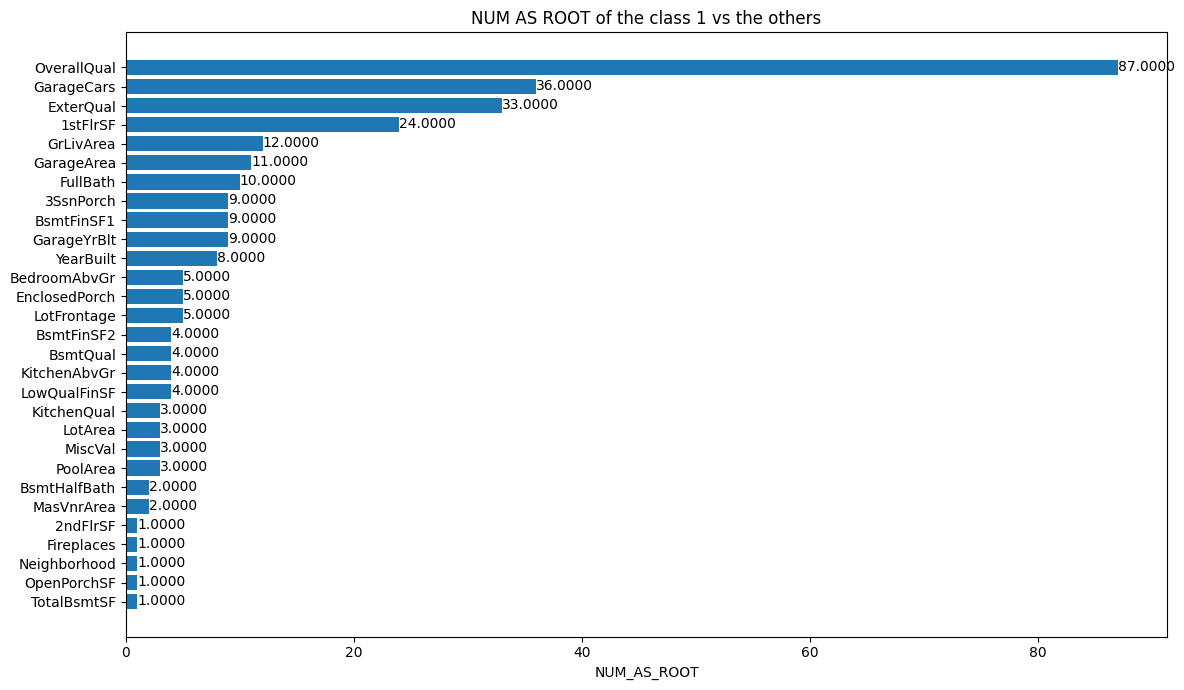

In [93]:
plt.figure(figsize=(12, 7))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [97]:
test_file="dataset/house-prices-advanced-regression-techniques/test.csv"
test_data= pd.read_csv(test_file)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds= rf.predict(test_ds)
output=pd.DataFrame({'Id': ids,
                    'Sale Price': preds.squeeze()})

2/2 [==============================] - 0s 23ms/step


In [98]:
output.head(10)

,Id,Sale Price
0,1461,127475.398438
1,1462,151325.125000
2,1463,180881.031250
3,1464,186745.265625
4,1465,190978.046875
5,1466,182678.640625
6,1467,171348.031250
7,1468,175475.484375
8,1469,181569.687500
9,1470,121111.460938


In [101]:
sample_submission_df = pd.read_csv('dataset/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('dataset/house-prices-advanced-regression-techniques/submission.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 21ms/step


,Id,SalePrice
0,1461,127475.398438
1,1462,151325.125000
2,1463,180881.031250
3,1464,186745.265625
4,1465,190978.046875
